In [1]:

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
boston=load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
data=boston.data
type(data)

numpy.ndarray

In [9]:
data.shape

(506, 13)

In [10]:
data=pd.DataFrame(data=data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
data['Price']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [15]:
#sns.pairplot(data)

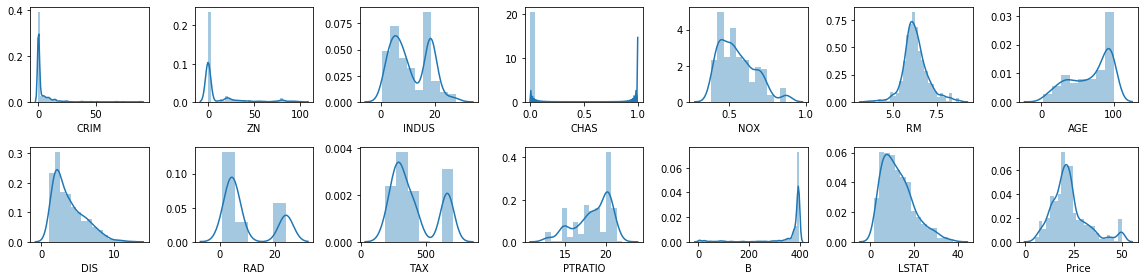

In [16]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows, ncols=cols,figsize=(16,4))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()
#the more normal distribution the more correlation

In [17]:
corrmat=data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


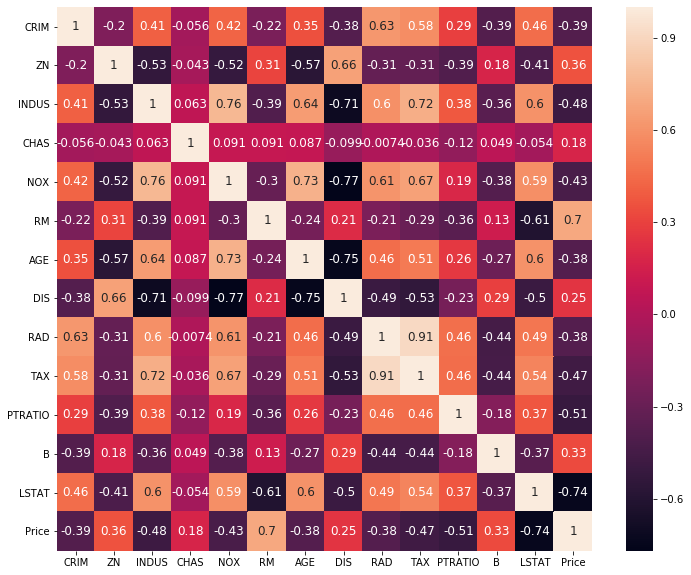

In [18]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size': 12})

In [19]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [20]:
#define function to refine those correlation more than 0.5 with abs value
def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [21]:
threshold=0.5
corr_value=getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [22]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [23]:
correlated_data=data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


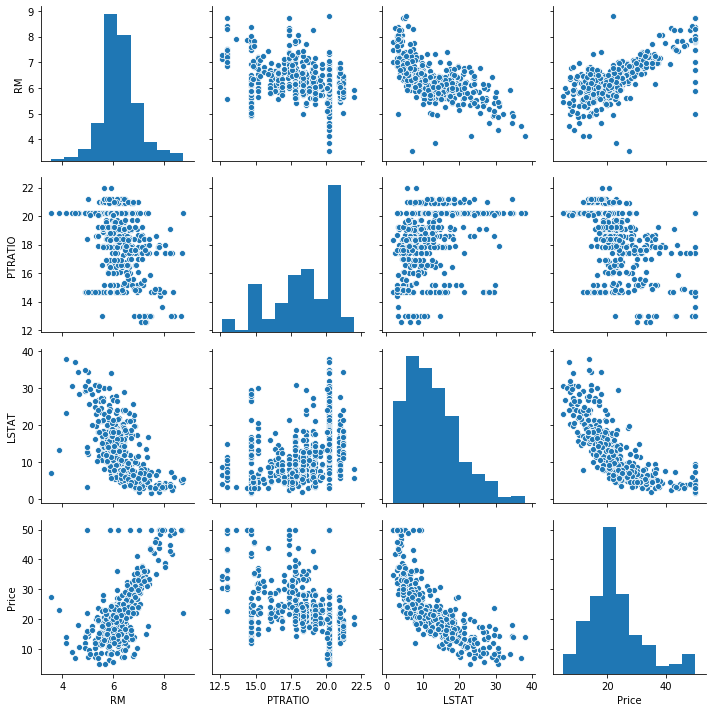

In [24]:
sns.pairplot(correlated_data)
plt.tight_layout()

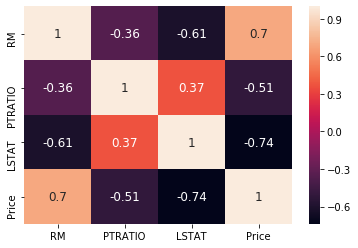

In [25]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})

In [26]:
X=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train.shape,X_test.shape

((404, 3), (102, 3))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_predict=model.predict(X_test)


In [32]:
y_predict,y_test

(array([27.60903054, 22.09903399, 26.52925454, 12.50798575, 22.25487898,
        20.17063891, 19.66763431, 21.17945215, 17.05361787, 21.47645249,
        14.61188065, 17.25203106, 17.87834594,  4.63763054, 39.49396811,
        34.51171811, 21.51354177, 38.44114322, 30.01522647, 22.1120067 ,
        25.01756609, 25.47821806, 18.29949317, 27.53525285, 22.04425617,
         9.8766314 , 17.64455251, 22.58495171, 35.56415926, 19.94695236,
        17.07488901, 18.54782062, 23.03506219, 24.0227991 , 27.32559903,
        17.39669651, 11.20037267, 21.01877579, 17.99452878, 13.48338053,
        27.03969738, 20.22025653, 25.79579308, 13.77875148, 28.87448892,
        25.92551494, 21.42412497, 24.76182896, 11.37786561, 23.54614643,
        24.91747489, 16.26246249, 23.05899832, 35.50989662, 14.52731963,
        22.83041034, 22.00550472, 20.52680975, 19.80762071, 18.37114766,
        23.84391837, 21.86386107, 32.71351223, 30.0351469 , 16.94378867,
        32.09219353, 19.25207073, 22.18373343, 18.9

In [33]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T.head(5)

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2


In [34]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("r2_score", score)
print("mae", mae)
print("mse", mse)

r2_score 0.48816420156925056
mae 4.404434993909258
mse 41.67799012221684


In [36]:
#store feature performance
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r3_score=[]
mae_value=[]
mse_value=[]

In [37]:
def performance_metrics(features, th, y_true,y_pred):
    score=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r3_score.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe=pd.DataFrame(data=[total_features_name, total_features,selected_correlation_value,r3_score,mae_value,mse_value],index=['Features name','Total features','corre value','r2 score','mae','mse'])
    return metrics_dataframe.T

In [38]:
th1=0.5


In [39]:
performance_metrics(correlated_data.columns.values,th1,y_test,y_predict)

,Features name,Total features,corre value,r2 score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


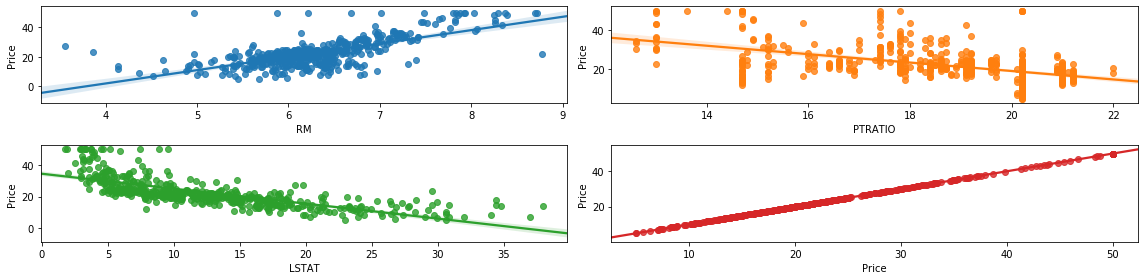

In [40]:
#regression plot of the features correlated with the house price
rows=2
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=correlated_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data['Price'],ax=ax[i][j])
        index=index+1
    fig.tight_layout()

In [41]:
corrmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [42]:
th3=0.60
corr_value=getCorrelatedFeature(corrmat['Price'],th3)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [43]:
correlated_data=data[corr_value.index]
correlated_data.head(2)

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6


In [44]:
def get_y_predict(corrdata):
    X=corrdata.drop(labels=['Price'],axis=1)
    y=corrdata['Price']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_predict
    
    

In [45]:
y_predict=get_y_predict(correlated_data)

In [46]:
performance_metrics(correlated_data.columns,th3,y_test,y_predict)

,Features name,Total features,corre value,r2 score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,"Index(['RM', 'LSTAT', 'Price'], dtype='object')",2,0.6,0.540908,4.14244,37.3831


In [47]:
th5=0.7
corr_value=getCorrelatedFeature(corrmat['Price'],th5)
correlated_data=data[corr_value.index]
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns,th5,y_test,y_predict)

,Features name,Total features,corre value,r2 score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,"Index(['RM', 'LSTAT', 'Price'], dtype='object')",2,0.6,0.540908,4.14244,37.3831
2,"Index(['LSTAT', 'Price'], dtype='object')",1,0.7,0.430957,4.86401,46.3363


In [48]:
#let us select only RM feature
correlated_data=data[['RM','Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [49]:
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns,th5,y_test,y_predict)

,Features name,Total features,corre value,r2 score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,"Index(['RM', 'LSTAT', 'Price'], dtype='object')",2,0.6,0.540908,4.14244,37.3831
2,"Index(['LSTAT', 'Price'], dtype='object')",1,0.7,0.430957,4.86401,46.3363
3,"Index(['RM', 'Price'], dtype='object')",1,0.7,0.423944,4.32474,46.9074


In [50]:
th6=0.4
corr_value=getCorrelatedFeature(corrmat['Price'],th6)
correlated_data=data[corr_value.index]
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns,th6,y_test,y_predict)

,Features name,Total features,corre value,r2 score,mae,mse
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,"Index(['RM', 'LSTAT', 'Price'], dtype='object')",2,0.6,0.540908,4.14244,37.3831
2,"Index(['LSTAT', 'Price'], dtype='object')",1,0.7,0.430957,4.86401,46.3363
3,"Index(['RM', 'Price'], dtype='object')",1,0.7,0.423944,4.32474,46.9074
4,"Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO',...",6,0.4,0.476203,4.3945,42.6519


In [51]:
#now let us find out what is normalization and standardization
#comparable distribution (m=0.0,s=1.0)

model=LinearRegression(normalize=True)
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)

0.48816420156925067

In [53]:
#learnuing curves
from sklearn.model_selection import learning_curve, ShuffleSplit



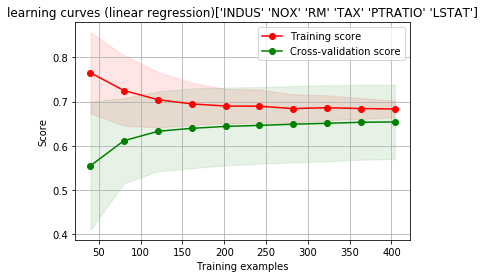

In [54]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color="r")
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color="g")
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

X=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']

title="learning curves (linear regression)" + str(X.columns.values)
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)

estimator=LinearRegression()
plot_learning_curve(estimator,title,X,y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)

plt.show()

In [62]:

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
X.columns

Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [63]:
regressor.coef_

array([ 4.26494747, -1.13654724, -0.57552137])

In [66]:
X.head(5)

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33


In [61]:

cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

ValueError: Shape of passed values is (3, 1), indices imply (6, 1)